<a href="https://colab.research.google.com/github/anupa-aa/ML-AI-Courswork-Module/blob/master/Anupa_Adikary_Q_NN_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expectation: A working solution where the learned class label using Neural Networks is similar (for most possible points) to the training class label. Also show the decision boundary.

Hopefully you will see much better solutions than the logistic regression case. Particulary for the last dataset.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

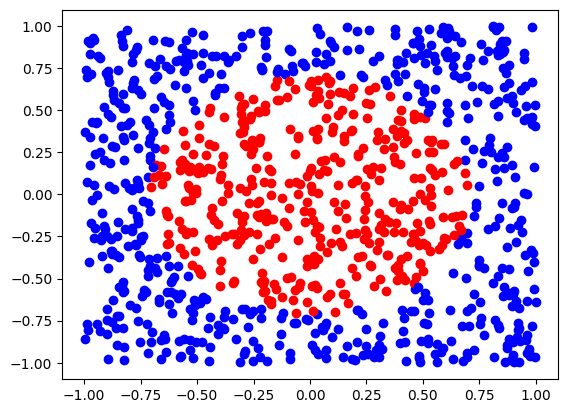

(2, 1000)
(1, 1000)


In [ ]:
#Q1
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def get_loss(yhat,  y):
  return np.sum(-y*np.log(yhat)- (1-y)*np.log(1-yhat) , axis = 1)



In [ ]:
print(X.shape, y.shape)

(2, 1000) (1, 1000)


In [ ]:
nh1 = 10
nh2 = 5
ni = X.shape[0]
no = y.shape[0]

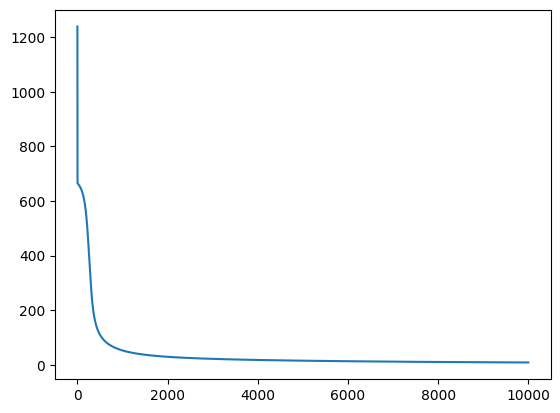

In [ ]:
W1 = np.random.randn(nh1,ni)
b1 = np.random.randn(nh1,1)

W2 = np.random.randn(nh2,nh1)
b2 = np.random.randn(nh2,1)

W3 = np.random.randn(no,nh2)
b3 = np.random.randn(no,1)

lr = 0.001
num_epochs = 10000
ls = []
for i in range(num_epochs):
  #forward pass
  Z1 = W1@X + b1
  A1 = sigmoid(Z1)

  Z2 = W2@A1 + b2
  A2 = sigmoid(Z2)

  Z3 = W3@A2 + b3
  A3 = sigmoid(Z3)

  loss = get_loss(A3, y)

  # backward pass
  dZ3 = A3 - y
  dW3 = dZ3 @ A2.T
  db3 = np.sum(dZ3, axis = 1, keepdims = True)

  dZ2 = W3.T @ dZ3 * A2*(1-A2)
  dW2 = dZ2 @ A1.T
  db2 = np.sum(dZ2, axis = 1, keepdims = True)

  dZ1 = W2.T @ dZ2 * A1*(1-A1)
  dW1 = dZ1 @ X.T
  db1 = np.sum(dZ1, axis = 1, keepdims = True)

  # optimization
  W3 -= lr*dW3
  b3 -= lr*db3
  W2 -= lr*dW2
  b2 -= lr*db2
  W1 -= lr*dW1
  b1 -= lr*db1

  ls.append(loss)

plt.plot(ls)

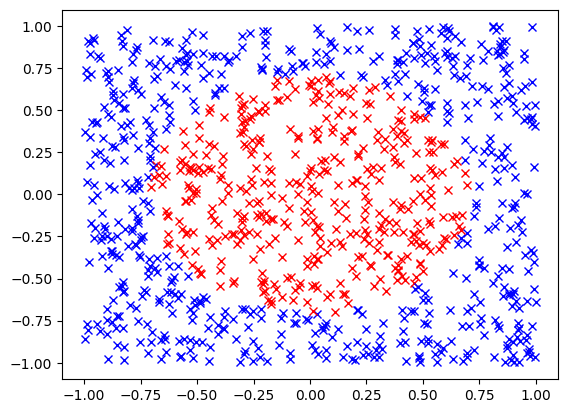

In [ ]:
plotClass(X,A3>0.5,'x')

In [ ]:
# Training data and validation data split

In [ ]:
ind = np.arange(X.shape[0])
np.random.shuffle(ind)

ind_val = ind[:200]
ind_train = ind[200:]

print(ind_val[:10], ind_train[:10])

Xv = X[ind_val,:]
yv = y[:, ind_val]

print(Xv.shape, yv.shape)



[833  83 114 533 467 932 480 173 670 591] [408 761 624 644 691 671  71 322 257 960]
(200, 2) (200, 1)


In [ ]:
# Training with mini batches

In [ ]:
def get_batches(X, y, bs):
  ind = np.arange(X.shape[0])
  np.random.shuffle(ind)
  ind_start = 0
  batches = []
  ind_end = 0
  while ind_end<X.shape[0]:
    ind_end = ind_start+bs
    Xbatch = X[ind_start: min(ind_end, X.shape[0]),:]
    ybatch = y[ind_start: min(ind_end, X.shape[0]),:]
    ind_start = ind_end
    batch = (Xbatch, ybatch)
    batches.append(batch)


  return batches



In [ ]:
batches = get_batches(X,y, 64)

In [ ]:
for batch in batches:
  print(batch[0].shape, batch[1].shape)

(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(64, 2) (64, 1)
(40, 2) (40, 1)
